<a href="https://colab.research.google.com/github/barkle2/Programming/blob/master/%5BPython%5D%20ML/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 패션 아이템 분류하기

- tensorflow, matplotlib.pyplot 모듈 로딩

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

- fashion_mnist 데이터 불러오기

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


- fashion mnist dataset의 학습 데이터 확인

In [4]:
print(train_images.shape)
print(train_images[0].shape)
print(train_labels.shape)
print(train_labels[0].shape)

(60000, 28, 28)
(28, 28)
(60000,)
()


- fashion mnist dataset의 검증 데이터 확인

In [6]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


- 학습데이터 하나 출력해보기

In [11]:
import numpy as np
np.set_printoptions(linewidth=150)
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

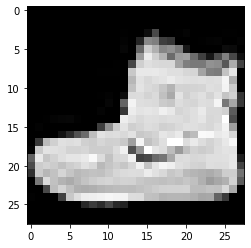

In [15]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

- 0~9 의 라벨이 어떤 옷인지는 이미 정의되어 있음

In [13]:
print(train_labels[0])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle Boot']
print(class_names[train_labels[0]])

9
Angle Boot


- 데이터의 값을 0 ~ 255 에서 0 ~ 1로 조정

In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

- 바뀐 데이터를 확인

In [18]:
np.set_printoptions(linewidth=300)
np.round(train_images[0], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.29, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.53, 0.5 , 0.24, 0.21, 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.4 , 0.8 , 0.69, 0.53,

- 머신러닝 모델 레이어 설정

In [19]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

- 모델의 옵티마이저, 손실함수, 평가지표 설정

In [21]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

- 학습하기

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6260 - accuracy: 0.7834
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3831 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

- 예측 정확도 계산

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8865


- 원하는 이미지를 입력하여 예측해보기

In [26]:
img = test_images[32]
label = test_labels[32]

- 신경망에 입력할 수 있도록 차원 추가

In [27]:
print(img.shape)
img = np.expand_dims(img, 0)
print(img.shape)

(28, 28)
(1, 28, 28)


- 예측해보기

In [29]:
prediction = model.predict(img)
prediction

array([[5.6338869e-04, 8.9129908e-03, 2.1851632e-04, 9.8957950e-01, 4.2745000e-04, 7.8447408e-07, 3.2400567e-05, 1.1667413e-08, 2.5397504e-04, 1.0989613e-05]], dtype=float32)

In [31]:
print('예측값:',np.argmax(prediction))
print('정답:', label)

예측값: 3
정답: 3


In [33]:
class_names[np.argmax(prediction)]

'Dress'